>> Yazeed Alobaidan

>> Faisal Almansour

>> Anas Alshehri

>Supervisor: Dr. Imran Qureshi

# Introduction

Diabetic Retinopathy (DR) is a leading cause of vision impairment globally, necessitating early detection for effective management and treatment. With the increasing availability of large-scale retinal image datasets, such as the EyePACS dataset, deep learning has emerged as a powerful tool to automate DR classification, improving diagnostic efficiency and accuracy.

This project focuses on developing a robust deep learning pipeline tailored for DR classification. Leveraging state-of-the-art architectures, preprocessing techniques like CLAHE, and advanced augmentations, the approach aims to address domain-specific challenges such as class imbalance and variability in retinal image quality. EfficientNetB3 serves as the backbone, paired with additional layers to refine feature extraction and classification.

Through meticulous model design and evaluation using metrics like accuracy, F1-Score, and AUC, the project seeks to provide a reliable solution for automating DR diagnosis while exploring opportunities to enhance performance and interpretability.

# Importing Datasets

## EyePacs Dataset

In [ ]:
! unzip "/content/drive/MyDrive/Datasets/EyePacs_After_enhancements_cropped.zip"

Streaming output truncated to the last 5000 lines.
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11321_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11335_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11340_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/1136_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11362_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11370_right.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11378_left.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11385_left.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11395_left.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11397_left.jpeg  
  inflating: EyePacs_images_after_enhancements_split/valid/Healthy/11407_right.jpeg  
  inflat

## APTOS

In [ ]:
! unzip "/content/drive/MyDrive/Datasets/APTOS2019.zip"

Archive:  /content/drive/MyDrive/Datasets/APTOS2019.zip
replace APTOS/Advanced/001639a390f0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: APTOS/Advanced/001639a390f0.png  
  inflating: APTOS/Advanced/0083ee8054ee.png  
  inflating: APTOS/Advanced/0104b032c141.png  
  inflating: APTOS/Advanced/0243404e8a00.png  
  inflating: APTOS/Advanced/02685f13cefd.png  
  inflating: APTOS/Advanced/02dda30d3acf.png  
  inflating: APTOS/Advanced/0318598cfd16.png  
  inflating: APTOS/Advanced/034cb07a550f.png  
  inflating: APTOS/Advanced/03a7f4a5786f.png  
  inflating: APTOS/Advanced/03c85870824c.png  
  inflating: APTOS/Advanced/042470a92154.png  
  inflating: APTOS/Advanced/05cd0178ccfe.png  
  inflating: APTOS/Advanced/069f43616fab.png  
  inflating: APTOS/Advanced/070f67572d03.png  
  inflating: APTOS/Advanced/07122e268a1d.png  
  inflating: APTOS/Advanced/07a0e34c8d20.png  
  inflating: APTOS/Advanced/080ee76c958c.png  
  inflating: APTOS/Advanced/080f66eedfb9.png  
  inflating: APTO

# PreProcessing (CLAHE and Median , CROPPING , Combining the classes, SPLITTING)

This step was done locally in my machine and then uploaded to the drive for ease of use during model development.  **(((DONT RUN THESE CELLS)))**

Applying CLAHE and Median Filters

In [ ]:

# Define the directory where the enhanced images will be saved
save_dir = "EyePacs_images_after_enhancements_seperated"  # One big folder for enhanced images

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Function to apply Median Filter and CLAHE, and save the image
def apply_median_and_clahe(image, image_name):
    # Convert to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split LAB into L, A, B channels
    l, a, b = cv2.split(lab_image)

    # Apply Median Filter to the L channel (lightness)
    median_filtered_l = cv2.medianBlur(l, 5)  # Adjust kernel size if needed

    # Step 4: Apply CLAHE to the median-filtered L channel
    clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(32, 32))
    clahe_l = clahe.apply(median_filtered_l)

    # Merge the CLAHE-enhanced L channel with the original A and B channels
    lab_enhanced = cv2.merge((clahe_l, a, b))

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

    # Save the enhanced image in the "after_enhancements" folder
    save_path = os.path.join(save_dir, f"{image_name}.png")
    cv2.imwrite(save_path, enhanced_image)

# Directory containing the class subfolders (your original train images)
train_dir = 'train_images'  # Update with your actual path

# Loop over each class folder in the train_images directory
for image_name in tqdm(os.listdir(train_dir), desc="Processing images"):
    image_path = os.path.join(train_dir, image_name)

    # Load the image
    image = cv2.imread(image_path)

    # Remove file extension for naming consistency
    img_name = os.path.splitext(image_name)[0]

    if image is not None:
                # Apply Median Filter and CLAHE, and save the enhanced image
            apply_median_and_clahe(image, img_name)
    else:
            print(f"Failed to load image: {image_path}")


Combining the 1 and 2 classes to "Early_DR"


Combining the 3 and 4 classes to "Advanced"

In [ ]:
# Function to move images from source to destination and delete the source folder
def move_and_delete_folder(source_folder, destination_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)

        # Only move files (skip directories)
        if os.path.isfile(source_path):
            shutil.move(source_path, destination_path)
            print(f"Moved: {file_name}")

    # Remove the source folder after all files are moved
    os.rmdir(source_folder)
    print(f"Deleted folder: {source_folder}")

# Move images from both folders and delete the folders
# Paths to your source folders
folder_3 = "EyePacs_images_after_enhancements_seperated/1"
folder_4 = "EyePacs_images_after_enhancements_seperated/2"

# Path to the destination folder
destination_folder = "EyePacs_images_after_enhancements_seperated/Early_DR"
os.makedirs(destination_folder, exist_ok=True)

move_and_delete_folder(folder_3, destination_folder)
move_and_delete_folder(folder_4, destination_folder)
print(f"All images have been moved to {destination_folder} and folders deleted.")

# Paths to your source folders
folder_5 = "EyePacs_images_after_enhancements_seperated/3"
folder_6 = "EyePacs_images_after_enhancements_seperated/4"

# Path to the destination folder
destination_folder = "EyePacs_images_after_enhancements_seperated/Advanced"
os.makedirs(destination_folder, exist_ok=True)

move_and_delete_folder(folder_5, destination_folder)
move_and_delete_folder(folder_6, destination_folder)

print(f"All images have been moved to {destination_folder} and folders deleted.")


Removing the Black Background

In [ ]:


def remove_black_background(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold to create a binary mask
    _, binary_mask = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours are detected, return the original image
    if not contours:
        print(f"No contours found for {image_path}. Returning the original image.")
        return image

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle for the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the image to the bounding rectangle
    cropped_image = image[y:y+h, x:x+w]

    # Create a circular mask
    mask = np.zeros_like(cropped_image)
    (center_x, center_y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(center_x - x), int(center_y - y))  # Adjust center to cropped image coordinates
    cv2.circle(mask, center, int(radius), (255, 255, 255), thickness=-1)

    # Apply the mask to the cropped image
    result = cv2.bitwise_and(cropped_image, mask)

    return result

def process_folder(input_folder):
    # Collect all image paths in the folder
    image_paths = []
    for root, _, files in os.walk(input_folder):
        for file_name in files:
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process only images
                image_paths.append(os.path.join(root, file_name))

    # Use tqdm to display progress
    for file_path in tqdm(image_paths, desc="Processing Images"):
        try:
            # Process the image
            processed_image = remove_black_background(file_path)

            # Overwrite the original image with the processed one
            cv2.imwrite(file_path, processed_image)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Path to the folder containing the images
input_folder = "train_images/Advanced"

# Apply the black background removal to all images in the folder
process_folder(input_folder)
process_folder("train_images/Early_DR")
process_folder("train_images/Healthy")


Splitting the EyePacs into train and val. 80/20

In [ ]:

def split_dataset(base_folder, output_folder, train_ratio=0.8):
    """
    Splits dataset into train and validation folders, maintaining the class structure.

    Args:
        base_folder (str): Path to the folder containing class subfolders.
        output_folder (str): Path to the output folder for train and validation splits.
        train_ratio (float): Proportion of data to use for training. The rest is for validation.
    """
    # Define paths for train and validation folders
    train_folder = os.path.join(output_folder, "train")
    valid_folder = os.path.join(output_folder, "valid")

    # Create output directories
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(valid_folder, exist_ok=True)

    # Loop through each class folder in the base folder
    for class_name in os.listdir(base_folder):
        class_path = os.path.join(base_folder, class_name)
        if os.path.isdir(class_path):
            # Get all image files in the class folder
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            if len(images) == 0:
                print(f"Skipping empty class folder: {class_name}")
                continue

            # Split into train and validation sets
            train_images, valid_images = train_test_split(images, train_size=train_ratio, random_state=42)

            # Create class subfolders in train and valid folders
            train_class_folder = os.path.join(train_folder, class_name)
            valid_class_folder = os.path.join(valid_folder, class_name)
            os.makedirs(train_class_folder, exist_ok=True)
            os.makedirs(valid_class_folder, exist_ok=True)

            # Move or copy images to the respective folders
            for img in tqdm(train_images, desc=f"Processing train for {class_name}"):
                shutil.move(os.path.join(class_path, img), os.path.join(train_class_folder, img))
            for img in tqdm(valid_images, desc=f"Processing valid for {class_name}"):
                shutil.move(os.path.join(class_path, img), os.path.join(valid_class_folder, img))

            print(f"Processed class '{class_name}': {len(train_images)} train, {len(valid_images)} valid")

# Paths
base_folder = "EyePacs_images_after_enhancements_seperated"  # Original folder with class subfolders
output_folder = "EyePacs_images_after_enhancements_split"  # New folder with train and valid splits

# Split dataset
split_dataset(base_folder, output_folder, train_ratio=0.8)


## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from albumentations import (HorizontalFlip, VerticalFlip, RandomBrightnessContrast, ShiftScaleRotate, Blur, GaussNoise, HueSaturationValue, Resize, Compose)
from albumentations.core.composition import OneOf
from tensorflow.keras.layers import Flatten, Dense,GlobalAveragePooling2D, Dropout, Conv2D, AveragePooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,AdamW
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import AUC, F1Score
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Analyze the dataset distribution before augmentation

In [ ]:


def analyze_dataset_distribution(dataset_path):
    # Dictionary to store class distributions
    class_distribution = {}

    # Iterate through subfolders (classes)
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            # Count the number of images in the class folder
            num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_distribution[class_name] = num_images

    # Display the results
    print("\n=== Dataset Distribution ===")
    total_images = 0
    for class_name, count in class_distribution.items():
        print(f"Class: {class_name}, Images: {count}")
        total_images += count
    print(f"\nTotal images in dataset: {total_images}")

    return class_distribution

# Path to the main dataset folder
dataset_path_after = "/content/EyePacs_images_after_enhancements_split/train"

# Analyze the dataset
class_distribution = analyze_dataset_distribution(dataset_path_after)
class_distribution2= analyze_dataset_distribution("/content/EyePacs_images_after_enhancements_split/valid")



=== Dataset Distribution ===
Class: Advanced, Images: 1264
Class: Early_DR, Images: 6188
Class: Healthy, Images: 20648

Total images in dataset: 28100

=== Dataset Distribution ===
Class: Advanced, Images: 317
Class: Early_DR, Images: 1547
Class: Healthy, Images: 5162

Total images in dataset: 7026


## Data Augmentation

UpSampling the Advanced class

In [ ]:

for i in range(5):
  counter=0

  # Path to your input folder and output folder
  input_folder = "/content/EyePacs_images_after_enhancements_split/train/Advanced"
  output_folder = "/content/EyePacs_images_after_enhancements_split/train/Advanced"

  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)

  # Define augmentations
  transform = Compose([
      Resize(600, 600),  # Resize all images to a fixed size
      HorizontalFlip(p=0.5),  # Randomly flip horizontally
      VerticalFlip(p=0.5),    # Randomly flip vertically
      ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.3),  # Small shifts, scaling, and rotations
      RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),  # Random brightness and contrast
      HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),  # Adjust color properties
      OneOf([
          Blur(blur_limit=3, p=0.3),  # Apply blur
          GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add Gaussian noise
      ], p=0.3),
  ])

  # Apply augmentations
  for image_name in os.listdir(input_folder):
      image_path = os.path.join(input_folder, image_name)
      if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
          continue

      # Read the image
      image = cv2.imread(image_path)
      if image is None:
          continue

      # Apply transformations
      augmented = transform(image=image)
      augmented_image = augmented['image']
      counter+=1

      # Save the augmented image to the output folder
      output_path = os.path.join(output_folder, f"aug_{image_name}")
      cv2.imwrite(output_path, augmented_image)
  print(counter)

1264
2528
3792
5056
6320


UpSampling the Early class

In [ ]:

for i in range(2):
  counter=0

  # Path to your input folder and output folder
  input_folder = "/content/EyePacs_images_after_enhancements_split/train/Early_DR"
  output_folder = "/content/EyePacs_images_after_enhancements_split/train/Early_DR"

  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)

  # Define augmentations
  transform = Compose([
      Resize(600, 600),  # Resize all images to a fixed size
      HorizontalFlip(p=0.5),  # Randomly flip horizontally
      VerticalFlip(p=0.5),    # Randomly flip vertically
      ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, p=0.3),  # Small shifts, scaling, and rotations
      RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),  # Random brightness and contrast
      HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),  # Adjust color properties
      OneOf([
          Blur(blur_limit=3, p=0.3),  # Apply blur
          GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add Gaussian noise
      ], p=0.3),
  ])

  # Apply augmentations
  for image_name in os.listdir(input_folder):
      image_path = os.path.join(input_folder, image_name)
      if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
          continue

      # Read the image
      image = cv2.imread(image_path)
      if image is None:
          continue

      # Apply transformations
      augmented = transform(image=image)
      augmented_image = augmented['image']
      counter+=1

      # Save the augmented image to the output folder
      output_path = os.path.join(output_folder, f"aug_{image_name}")
      cv2.imwrite(output_path, augmented_image)
  print(counter)

6188
12376


Analyze the dataset distribution after augmentation

In [ ]:

class_distribution = analyze_dataset_distribution(dataset_path_after)
class_distribution2= analyze_dataset_distribution("/content/EyePacs_images_after_enhancements_split/valid")



=== Dataset Distribution ===
Class: Advanced, Images: 7584
Class: Early_DR, Images: 18564
Class: Healthy, Images: 20648

Total images in dataset: 46796

=== Dataset Distribution ===
Class: Advanced, Images: 317
Class: Early_DR, Images: 1547
Class: Healthy, Images: 5162

Total images in dataset: 7026


## Loading the images from the directory to train / valid / test
- 600x600 image size
- categorical

In [ ]:
# EyePacs After Processing cropped and splitted

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/EyePacs_images_after_enhancements_split/train",
    seed=24,
    image_size=(600, 600),
    label_mode="categorical"
    )

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/EyePacs_images_after_enhancements_split/valid",
    seed=24,
    image_size=(600, 600),
     label_mode="categorical")

Found 46796 files belonging to 3 classes.
Found 7026 files belonging to 3 classes.


In [ ]:
# TEST DATASET APTOS2019

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/APTOS",
    seed=24,
    batch_size=34,
    image_size=(600,600),
    label_mode="categorical"
    )


Found 3662 files belonging to 3 classes.


Normalize the images

In [ ]:

# Define preprocessing pipeline
def preprocess(image, label):

    image = image / 255.0  # Normalize to [0, 1]

    return image, label

# Apply to dataset
train_dataset = train_dataset.map(preprocess)
valid_dataset = valid_dataset.map(preprocess)
test_dataset  = test_dataset.map(preprocess)

# Model Building

Defining our base model which is the EfficientNetB3

In [ ]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(600, 600, 3))

## Model Architecture

In [ ]:

model = Sequential([

    base_model,

    Conv2D(256, (3, 3), activation="swish", padding='same',),
    BatchNormalization(),

    AveragePooling2D((3, 3)),

    Conv2D(128, (3, 3), activation="swish", padding='same',),
    BatchNormalization(),
    AveragePooling2D((3, 3)),

    Conv2D(64, (3, 3), activation="swish", padding='same', ),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    GlobalAveragePooling2D(),

    Dense(1024, activation="relu", kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation="relu", kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),


    Dense(128, activation="relu", kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu", kernel_regularizer=l2(1e-4)),


    Dense(3, activation='softmax')  # Output layer for 3 classes
])

Compiling the model

using Adam as the optimizer with a learning rate of 0.0001

and CategoricalCrossentropy as our loss function with label smoothing of 0.15

and choosing Accuracy, F1score and AUC as our metrics

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.15),
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.F1Score(average='weighted')
    ]
)

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 19, 19, 1536)        │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 19, 19, 256)         │       3,539,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 19, 19, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_12                 │ (None, 6, 6, 256)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_13                 │ (None, 2, 2, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 2, 2, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_14                 │ (None, 1, 1, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │              

 Total params: 15,365,490 (58.61 MB)

 Trainable params: 15,273,963 (58.27 MB)

 Non-trainable params: 91,527 (357.53 KB)

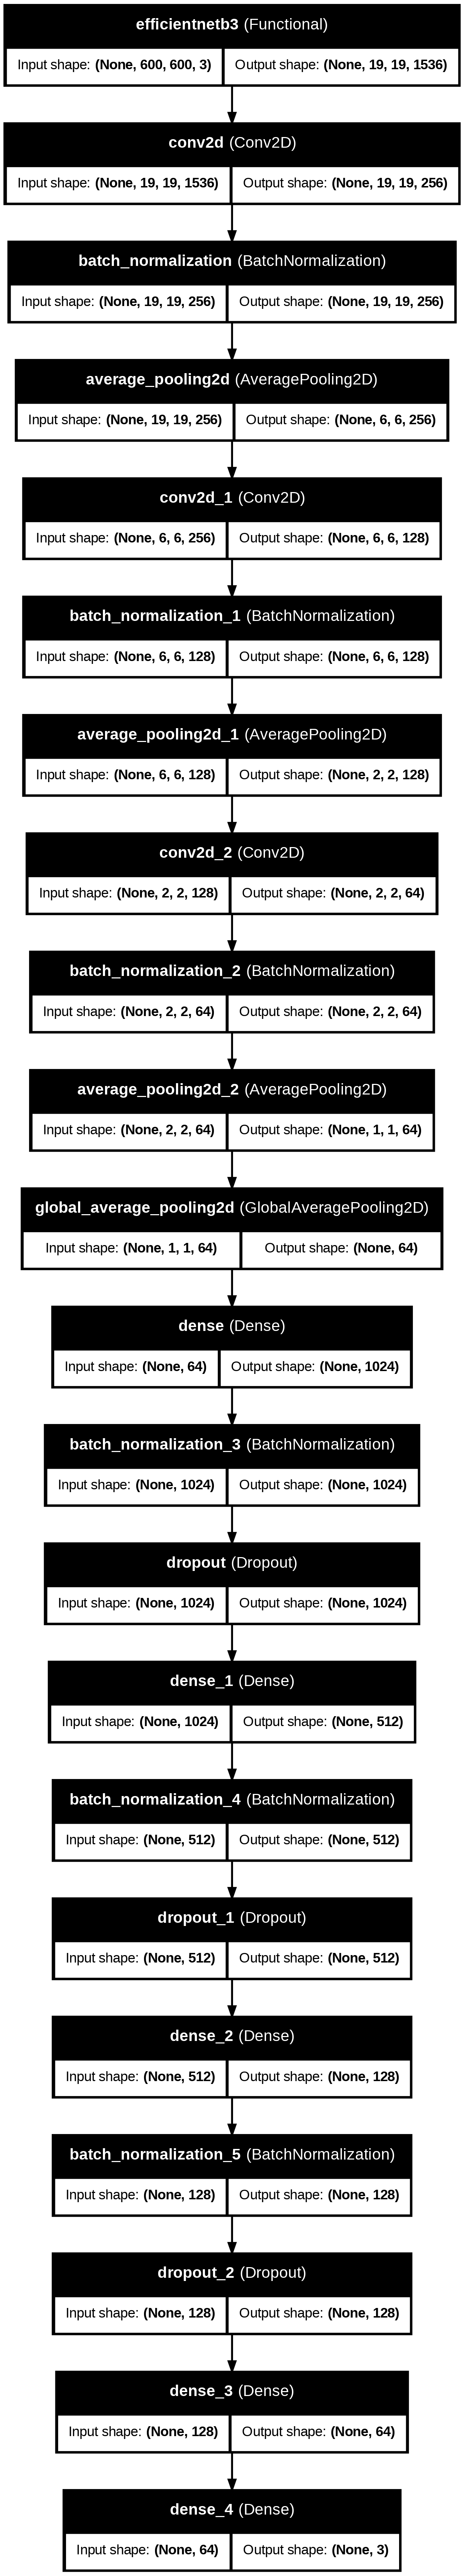

In [ ]:
# Plot and save the model architecture
plot_model(
    loaded_model,
    to_file='model_arch.png',  # File name to save the diagram
    show_shapes=True,          # Display the shape of the layers
    show_layer_names=True,     # Display the layer names
)

In [ ]:
model.fit(train_dataset,batch_size=4 ,epochs=20 ,validation_data=valid_dataset, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5, restore_best_weights=True)])

## Results of the validation set

In [ ]:

# Step 1: Make predictions
y_true = []
y_pred = []
y_pred_probs = []
# Iterate through the dataset to get true labels and predicted labels
for images, labels in valid_dataset:
    predictions = loaded_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))  # Assuming a classification model
    y_pred_probs.extend(predictions)

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)
# Convert y_true to integer labels if one-hot encoded
if len(y_true.shape) > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Convert y_pred to integer labels if not already
if len(y_pred.shape) > 1:  # Check if y_pred is one-hot encoded or logits
    y_pred = np.argmax(y_pred, axis=1)

# Step 2: Calculate metrics
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification report (includes precision, recall, and F1 score)
class_report = classification_report(y_true, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy")
print(accuracy_score(y_true, y_pred))

print("\nF1Score:")
print(f1_score(y_true, y_pred, average='weighted'))

print("\nClassification Report:")
print(class_report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9

### Confusion Matrix of the Validation set

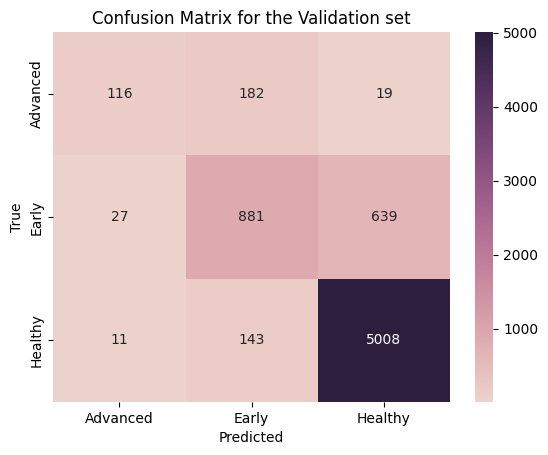

In [ ]:
# use sns to create confustion matrix
class_names = ["Advanced", "Early", "Healthy"]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True),xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the Validation set')
plt.show()

In [ ]:

loaded_model.evaluate(valid_dataset)


220/220 ━━━━━━━━━━━━━━━━━━━━ 2187s 10s/step - accuracy: 0.8582 - auc: 0.9320 - f1_score: 0.8466 - loss: 0.7518


[0.7578094601631165, 0.8546826243400574, 0.9303504228591919, 0.842750608921051]

## Saving the model

Saving the model in the .h5 and .keras formats

In [ ]:
model.save("/content/drive/MyDrive/effnetb3(85)so images 7 18 20.keras")
model.save("/content/drive/MyDrive/effnetb3(85)so images 7 18 20.h5")


In [ ]:
loaded_model = load_model("/content/drive/MyDrive/effnetb3(85)so images 7 18 20.h5")

## Evaluating the model on the APTOS2019 dataset

In [ ]:
loaded_model.evaluate(test_dataset)

108/108 ━━━━━━━━━━━━━━━━━━━━ 120s 763ms/step - accuracy: 0.8351 - auc: 0.9265 - f1_score: 0.8373 - loss: 0.7737


[0.7740606665611267, 0.836155116558075, 0.9256513714790344, 0.8386769890785217]

In [ ]:

# Step 1: Make predictions
y_true = []
y_pred = []
y_pred_probs = []
# Iterate through the dataset to get true labels and predicted labels
for images, labels in test_dataset:
    predictions = loaded_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))  # Assuming a classification model
    y_pred_probs.extend(predictions)
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)
# Convert y_true to integer labels if one-hot encoded
if len(y_true.shape) > 1:  # Check if y_true is one-hot encoded
    y_true = np.argmax(y_true, axis=1)

# Convert y_pred to integer labels if not already
if len(y_pred.shape) > 1:  # Check if y_pred is one-hot encoded or logits
    y_pred = np.argmax(y_pred, axis=1)

# Step 2: Calculate metrics
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification report (includes precision, recall, and F1 score)
class_report = classification_report(y_true, y_pred, target_names=['Advanced DR', 'Early DR', 'Healthy'])

# Print results
print("Confusion Matrix:")
print(conf_matrix)

print("\n Accuracy")
print(accuracy_score(y_true, y_pred))

print("\nF1Score:")
print(f1_score(y_true, y_pred, average='weighted'))

print("\nClassification Report:")
print(class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 848ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 845ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 842ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 871ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 904ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 620ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 605ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 617ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 562ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 567ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 592ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 514ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 549ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 548ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 523ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 490ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 514ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 586ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 495ms/step
2/2 ━━━━━━━━━━━━

### Confusion Matrix of the APTOS2019 dataset

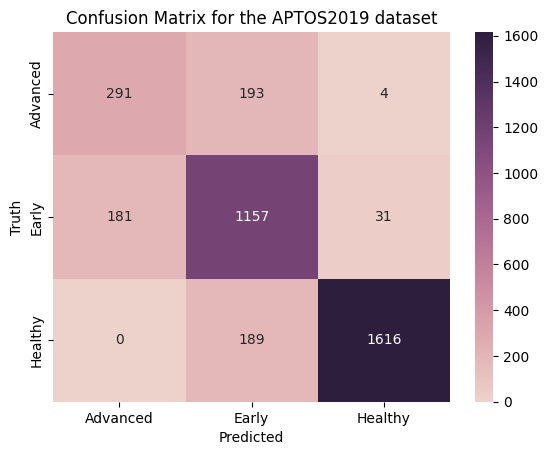

In [ ]:
# use sns to create confustion matrix
class_names = ["Advanced", "Early", "Healthy"]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True),xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Truth')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for the APTOS2019 dataset')
plt.show()

# Visualizing the Most Important Parts of the Image

## Occlusion Sensitivity

In [ ]:

IMG_SIZE = (600, 600)

def load_and_preprocess_image(image_path):
    # Load image via OpenCV
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize to match your model’s input shape
    img = cv2.resize(img, IMG_SIZE)
    # Scale/normalize as your model expects, e.g. rescale [0,255] -> [0,1]
    img = img.astype(np.float32) / 255.0
    return img

# Load the image
original_img = load_and_preprocess_image("/content/EyePacs_images_after_enhancements_split/valid/Advanced/10904_right.jpeg")

# Create a batch dimension: (1, H, W, C)
input_array = np.expand_dims(original_img, axis=0)

# Load the image
original_img_test_data = load_and_preprocess_image("/content/APTOS/Advanced/b019a49787c1.png")

# Create a batch dimension: (1, H, W, C)
input_array_test_data = np.expand_dims(original_img_test_data, axis=0)

In [ ]:
def occlusion_sensitivity_map(model, image, patch_size, stride, class_index=None):
    """
    Computes occlusion sensitivity by sliding a patch over the image and
    measuring the change in the model's predicted score for a given class.

    Arguments:
    ----------
    model : tf.keras.Model
        The trained model to interpret.
    image : np.array
        Shape (H, W, 3) preprocessed if needed, or (1, H, W, 3).
    patch_size : int
        The size of the occluding square patch (e.g., 20 pixels).
    stride : int
        Step size to move the patch each time.
    class_index : int (optional)
        Which class index’s confidence to track. If None, use top predicted class.

    Returns:
    --------
    heatmap : np.array
        A 2D array (H, W) showing the sensitivity scores.
    """

    # If the input is (H, W, 3), add a batch dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get the original prediction
    preds = model.predict(image)
    if class_index is None:
        class_index = np.argmax(preds[0])
    original_score = preds[0][class_index]

    # Prepare a heatmap to store drop in score
    _, H, W, C = image.shape
    heatmap = np.zeros((H, W), dtype=np.float32)

    for y in range(0, H, stride):
        for x in range(0, W, stride):
            # Make a copy of the original image
            occluded_image = image.copy()

            # Define patch boundaries
            y1, y2 = y, min(y + patch_size, H)
            x1, x2 = x, min(x + patch_size, W)

            # Occlude the region (e.g., set to 0 or mean color)
            occluded_image[0, y1:y2, x1:x2, :] = 0.0

            # Predict again
            preds_occ = model.predict(occluded_image)
            occluded_score = preds_occ[0][class_index]

            # The drop in score
            score_drop = original_score - occluded_score

            # Record it in the heatmap (centered at the patch)
            heatmap[y1:y2, x1:x2] += score_drop

    # Normalize heatmap to [0, 1] if desired
    heatmap -= heatmap.min()
    if heatmap.max() > 0:
        heatmap /= heatmap.max()

    return heatmap


In [ ]:

# Get the heatmap for the top predicted class or a specific class
heatmap = occlusion_sensitivity_map(loaded_model, input_array, patch_size=30, stride=15)

heatmap_test_data = occlusion_sensitivity_map(loaded_model, input_array_test_data, patch_size=30, stride=15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### Visualizng on an image from the validation set (Advanced Class)

In [ ]:
# Overlay the heatmap on the original (resized) image
original_img_uint8 = (original_img * 255).astype(np.uint8)
heatmap_3ch = cv2.applyColorMap((heatmap*255).astype(np.uint8), cv2.COLORMAP_JET)
heatmap_3ch = cv2.cvtColor(heatmap_3ch, cv2.COLOR_BGR2RGB)
blended = cv2.addWeighted(original_img_uint8, 0.6, heatmap_3ch, 0.4, 0)



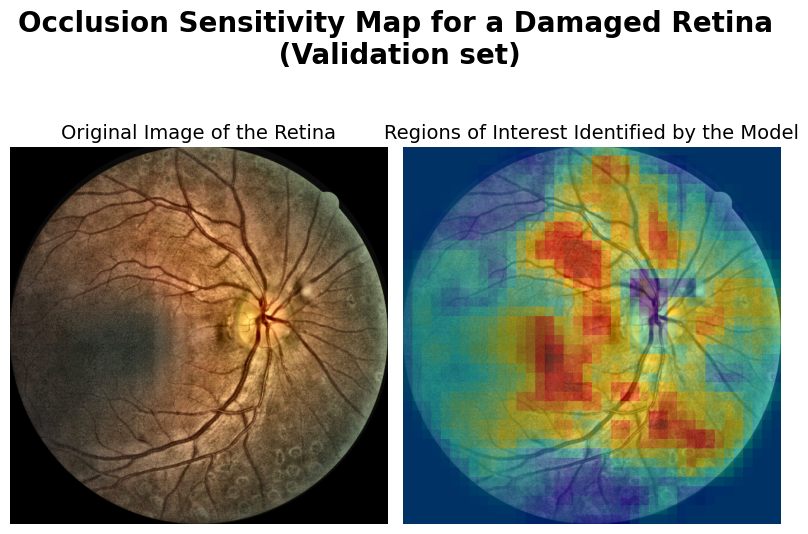

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))  # 1 row, 2 columns
fig.suptitle("Occlusion Sensitivity Map for a Damaged Retina\n (Validation set)", fontsize=20, fontweight="bold",)

# Plot the first image (original image)
axes[0].imshow(original_img_uint8)
axes[0].axis("off")  # Turn off axes
axes[0].set_title("Original Image of the Retina", fontsize=14)

# Plot the second image (heatmap blended)
axes[1].imshow(blended)
axes[1].axis("off")  # Turn off axes
axes[1].set_title("Regions of Interest Identified by the Model", fontsize=14)

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()


### Visualizng on an image from the APTOS2019 dataset (Advanced Class)

In [ ]:
# Overlay the heatmap on the original (resized) image of a test image
original_img_test_data_uint8 = (original_img_test_data * 255).astype(np.uint8)
heatmap_3ch_test = cv2.applyColorMap((heatmap_test_data*255).astype(np.uint8), cv2.COLORMAP_JET)
heatmap_3ch_test = cv2.cvtColor(heatmap_3ch_test, cv2.COLOR_BGR2RGB)
blended2 = cv2.addWeighted(original_img_test_data_uint8, 0.6, heatmap_3ch_test, 0.4, 0)


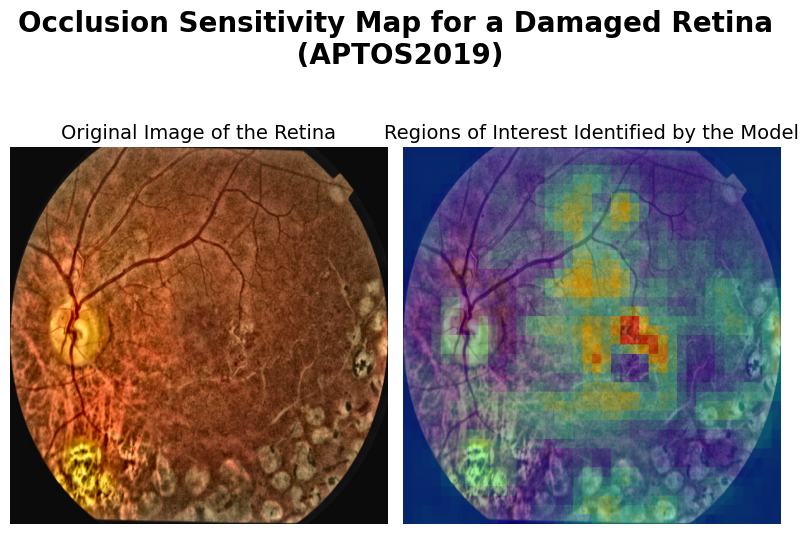

In [ ]:

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))  # 1 row, 2 columns
fig.suptitle("Occlusion Sensitivity Map for a Damaged Retina\n (APTOS2019)", fontsize=20, fontweight="bold",)

# Plot the first image (original image)
axes[0].imshow(original_img_test_data_uint8)
axes[0].axis("off")  # Turn off axes
axes[0].set_title("Original Image of the Retina", fontsize=14)

# Plot the second image (heatmap blended)
axes[1].imshow(blended2)
axes[1].axis("off")  # Turn off axes
axes[1].set_title("Regions of Interest Identified by the Model", fontsize=14)

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()


# Conclusion

This project addressed Diabetic Retinopathy classification using the EyePACS dataset, achieving ~86% accuracy, an F1-Score of 84 and an AUC of 93 in the validation set. and on the APTOS2019 dataset, the model achieved 84% accuracy, an F1-score of ~84 and an AUC of ~93. Key steps included CLAHE and Median preprocessing, black background removal, and advanced augmentations with Albumentations. EfficientNetB3 was fine-tuned with additional convolutional and dense layers. then using Occlusion Sensitivity to visualize the most important parts of the retina according to the model. To enhace the credibility of the model.